In [4]:
# 테스트 libary
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from pandas_datareader import data
import matplotlib.pyplot as plt

# 차트 한글깨짐 방지
import matplotlib as mp
mp.rcParams['font.family'] = 'Malgun Gothic'
mp.rcParams['axes.unicode_minus'] = False

In [9]:
df = sns.load_dataset('titanic') # https://www.kaggle.com/c/titanic/data
df.head(2)
# 컬럼정보 https://computer-science-student.tistory.com/113
"""
PassengerId : 각 승객의 고유 번호
Survived : 생존 여부(종속 변수) : 0 = 사망 / 1 = 생존
Pclass : 객실 등급 - 승객의 사회적, 경제적 지위 : 1st = Upper / 2nd = Middle / 3rd = Lower
Name : 이름
Sex : 성별
Age : 나이
SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수
Parch : 동반한 Parent(부모) Child(자식)의 수
Ticket : 티켓의 고유넘버
Fare : 티켓의 요금
Cabin : 객실 번호
Embarked : 승선한 항 : C = Cherbourg / Q = Queenstown / S = Southampton
"""

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [16]:
# [문제-01] deck 컬럼을 삭제하고 나이(age)의 nan 테이터를 나이편균값으로 채우시오.
# df.drop(columns=['desk'], inplace=True) # desc 컬럼 삭제
display(df.filter(['age']).isnull().sum()) # age null 인 행 갯수
df.age.fillna(df.age.mean(), inplace=True)
display(df.filter(['age']).isnull().sum()) # age null 인 행 갯수

age    0
dtype: int64

age    0
dtype: int64

In [27]:
# [문제-02] 생존자와 사망자에 대한 갯수를 구하시오.
pd.DataFrame(df['alive'].value_counts()).T

,no,yes
alive,549,342


In [33]:
# [문제-03] 등급별(class) 생존평균을 구하시오.
df.groupby('class').mean().filter(['survived']) # 돈 많은 사람이 오래산다.

,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


In [38]:
# [문제-04] SibSp(가족과탑승)의 생존평균을 구하시오.
df.groupby('sibsp').mean()[['survived']]

,survived
sibsp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [37]:
# [문제-05] 혼자탑승(alone) 한 생존평균을 구하시오.
df.groupby('alone').mean()[['survived']]

,survived
alone,
False,0.505650
True,0.303538


In [39]:
# [문제-06] 성별 생존평균을 구하시오.
df.groupby('sex').mean()[['survived']]

,survived
sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='class'>

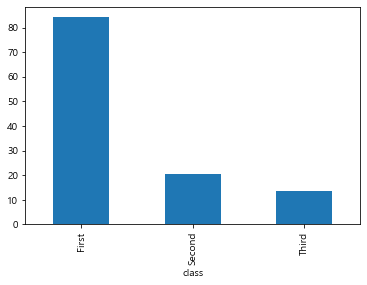

In [41]:
# [문제-07] 등급별 티켓 비용(fare)의 평균차트로 그리시오.
df.groupby('class').mean()['fare'].plot(kind='bar')

In [47]:
# [문제-08] 나이 분류 컬럼을 추가히시오.
#  1 - 15 : 미성년자
# 15 - 25 : 청년
# 25 - 35 : 중년
# 35 - 60 : 장년
# 60 ~    : 노년
ageMax = int(df.age.max())
df['나이분류'] = pd.cut( df['age'], [0,15,25,35,60,ageMax], labels=['미성년자','청년','중년','장년','노년'] )
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,나이분류
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,청년
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,장년
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,중년


<AxesSubplot:ylabel='나이분류'>

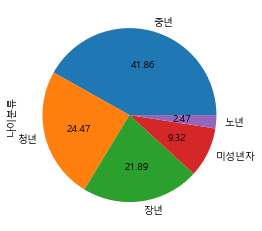

In [54]:
# [문제-09] 나이 분류를 파이 차트로 표시하시오.
sr = df['나이분류'].value_counts() # Series
sr.plot(kind='pie', autopct='%.2f') # autopct 비율표시

In [66]:
# [문제-10] 생존율이 가장 높은 나이분류를 구하시오.
df.groupby('나이분류').mean()[['survived']].sort_values('survived', ascending=False).head(1)

,survived
나이분류,
미성년자,0.590361


In [67]:
# [문제-11] 성별, 나이분류별, 등급(class)를 평균생존율을 값으로 표시하시오.
df.groupby(by=['sex','나이분류','class']).mean()[['survived']]

survived
sex    나이분류 class           
female 미성년자 First   0.666667
            Second  1.000000
            Third   0.533333
       청년   First   0.960000
            Second  0.947368
            Third   0.485714
       중년   First   1.000000
            Second  0.925926
            Third   0.562500
       장년   First   0.972222
            Second  0.850000
            Third   0.142857
       노년   First   1.000000
            Second       NaN
            Third   1.000000
male   미성년자 First   1.000000
            Second  1.000000
            Third   0.321429
       청년   First   0.363636
            Second  0.037037
            Third   0.108911
       중년   First   0.404762
            Second  0.119048
            Third   0.141176
       장년   First   0.370370
            Second  0.037037
            Third   0.068182
       노년   First   0.083333
            Second  0.333333
            Third   0.000000